**Pattern_Recognition_Report  5/13**

氏名: ZHU YIHUA (朱 羿華)
学籍番号: 6930-33-4521

# 1 Explanation of the data


Football is the most popular sport in the world, and every football player has a unique set of physical characteristics, personality traits, surroundings, and football talents. Therefore, evaluating players becomes an important work because it will benefit the football development and transfer market. We want to create a model from the massive attributes to predict the overall score for the other football player and the future one. The dataset comes from the FIFA football website(https://www.kaggle.com/bryanb/fifa-player-stats-database?select=FIFA22_official_data.csv). **We want to predict the values of overall score of football player from other 20 features.**

The features can be summarized as follows:
<br>
- Age(0): the age of football player
<br>
- Potential(1): describe the potential future level of this football player
<br>
- Crossing(2): the ability that can take the ball cross other people
<br>
- Finishing(3): the final shot ability of this football player
<br>
- HeadingAccuracy(4): the ability of using head
<br>
- ShortPassing(5): short distance of the football passing
<br>
- Dribbing(6): passing ability of this football player
<br>
- FKAccuracy(7): the frequency of mistakes
<br>
- LongPassing(8): long distance of the football passing
<br>
- Ballcontrol(9): the ability of controling the ball
<br>
- Acceleration(10): the normal run acceleration of the football player
<br>
- SprintSpeed(11): short distance pf the running speed
<br>
- Reactions(12): reaction for any situations in the match
<br>
- Shotpower(13): the muscle power for shotting
<br>
- Stamina(14): the stamina of this football player
<br>
- Strength(15): the strength of this football player
<br>
- LongShots(16): shot ability for long distance
<br>
- Aggression(17): the passion for the football and the spirit for aggression
<br>
- Penalties(18): the ability of penalties
<br>
- StandingTackle(19): stability of stand for this football player
<br>
- **Overall: the overall score for this football player, and that is what we want to predict**

# 2 Load and Prepare the data

we need to randomly select 15000 samples from the massive dataset, drop the object attributes like name, photo, etc. And then fulfill all the non-data by using the mean of this column data. After that, we split the final “Overall” column as our test labels to do the supervised learning. Finally, we randomly select 40% samples from the 15000 samples as our test data to evaluate the constructedmodel.

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data_0 = pd.read_csv('FIFA22_official_data.csv')
data_1 = data_0.sample(n = 15000, replace = True)   #data_1: randomly choose 15000 samples from the massive dataset
y = data_1['Overall']                                 
X = data_1.drop('Overall', axis = 1)
rng = np.random.RandomState(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=rng)
print(X_train.shape)
print(pd.DataFrame(data_1.head()))#The first 5 rows of the data.

(9000, 20)
      Overall  Age  Potential  Crossing  Finishing  HeadingAccuracy  \
7430       69   22         75        59         66               47   
411        75   34         75        72         71               71   
8258       71   23         76        47         29               72   
1160       70   22         77        66         70               53   
8285       74   23         80        70         65               46   

      ShortPassing  Dribbling  FKAccuracy  LongPassing  ...  Acceleration  \
7430            71         73          62           61  ...            82   
411             83         82          70           73  ...            54   
8258            73         65          28           62  ...            61   
1160            69         73          62           68  ...            81   
8285            70         80          48           60  ...            95   

      SprintSpeed  Reactions  ShotPower  Stamina  Strength  LongShots  \
7430           79         

# 3 Approaches


## 3.1 Linear Regression

### 3.1.1 Introduction

A linear model attempts to learn a function that predicts by a linear combination of properties.

$$f(\mathbf x) = w_0+w_1x_1+w_2x_2+w_3x_3+ \dots+w_{20}x_{20}$$



It can be writen in vector form:
$$f(\mathbf x) = \mathbf w^T\mathbf x$$

where

$$\mathbf w=(w_0,w_1,w_2,w_3,\dots,w_{20})$$

To determine the values of a and b, we could try to minimize the squared error, then we can show it like this:

$$(\mathbf w^*, b^*) = arg\,\min_{(w,b)}\sum_{r=1}^n(y_i - \mathbf w^T\mathbf x_i - b)$$

It can be showed as:

$$(\hat w^*) = arg\,\min_{(\hat w)}(\mathbf y - X\hat w)^T(\mathbf y - X\hat w)$$

where:

$$\mathbf y=(y_1,y_2,\dots,y_{n})$$

$$X = \begin{pmatrix}
1&x_{1,1}&x_{1,2}&\cdots&x_{1,20}\\
1&x_{2,1}&x_{2,2}&\cdots&x_{2,20}\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
1&x_{n,1}&x_{n,2}&\cdots&x_{n,20}\\
\end{pmatrix}$$

Let $E = (\mathbf y - X\hat w)^T(\mathbf y - X\hat w)$, take the derivative of $E$ with respect to $\hat w$

$$\frac{\partial E}{\partial \hat w} = 2X^T(X\hat w - \mathbf y )$$

Let the above equation be zero, we can get the optimal solution of $\hat w$

$$\hat w^* = (X^TX)^{-1}X^T\mathbf y$$

Finally, we can get the Linear Regression Model and use this model to predict the future overall score of the football player:

$$f(\mathbf x) = \mathbf x^T(X^TX)^{-1}X^T\mathbf y$$

### 3.1.2 Training

we finally can get a Wm, and use this trained parameter to predict future score

In [2]:
A_train = np.array(X_train)
y_train = np.array(y_train)

# add W0 to the matrix X
A_train = np.insert(A_train, 0, values=1, axis=1)  

#np.dot() Matrix multiplication    np.linalg.inv() matrix inverse multiplication
Wm = np.dot(np.dot(np.linalg.inv(np.dot(A_train.T, A_train)), A_train.T), y_train.T)

print(Wm)

[-1.30637334e+01  5.34586687e-01  5.55672239e-01  2.49417170e-02
 -8.91936221e-03 -1.98491600e-02  3.35915207e-02 -2.22977031e-02
 -4.14844918e-03  4.95072154e-03  2.94633872e-02  1.99303185e-02
  1.57208157e-02  2.82290975e-01  6.84083741e-02  1.90997681e-02
  4.78111444e-02 -2.99483670e-02 -1.53355639e-02 -3.42137878e-02
 -1.00212274e-02]


### 3.1.3 Results

we show the Quantitative Analysis(MSE) and Visualization for the prediction results.

MES of LR in test set: 4.125840635882284
MES of LR in training set 4.2999697278149425


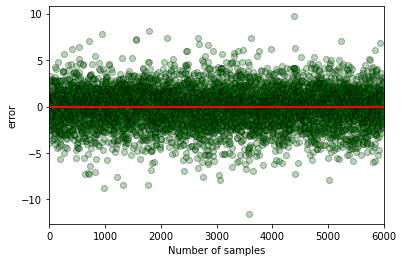

In [3]:
A_test = np.array(X_test)
y_test = np.array(y_test)

A_test = np.insert(A_test, 0, values=1, axis=1)

w = Wm.T
y_pred = np.dot(A_test,w)
y_pred_train = np.dot(A_train,w)


print('MES of LR in test set:',mean_squared_error(y_test, y_pred))
print('MES of LR in training set',mean_squared_error(y_train, y_pred_train))

error = y_test-y_pred

MSE_1_test = mean_squared_error(y_test, y_pred)
MSE_1_train = mean_squared_error(y_train, y_pred_train)

n=list(range(6000))
plt.scatter(n,error, facecolor='green', edgecolor='k', alpha=0.3)
plt.hlines(y=0, xmin=0,xmax=6000,lw=2,color='red')
plt.xlim([-1,6000])
plt.xlabel('Number of samples')
plt.ylabel('error')
plt.show()

error1 = error

## 3.2 Polymomial Basis Function


### 3.2.1 Introduction
In mathematics, a basis function is an element of a particular basis for a function space. Every function in the function space can be represented as a linear combination of basis functions, just as every vector in a vector space can be represented as a linear combination of basis vectors.

When the relationship between input and output is nonlinear, linear regression will not work well. So we will generalize Linear Regression Model to a Linear Basis Function Model, which can be used to react to non-linear relationships.

General linear model:

$$f(\mathbf x) = w_0+w_1x_1+w_2x_2+w_3x_3+ \dots+w_{13}x_{13}\$$

$$f(\mathbf x) = \mathbf w^T_{pol} \mathbf \phi(\mathbf x)$$

where $\phi_j(\mathbf x)$ is a nonlinear function of $\mathbf x$, and we call it Basis Function

Then, we regard $\mathbf \phi = (\phi_0,\phi_1,\phi_2,\phi_3,\dots,\phi_{m})$ as a new input, and solve it just like a m-dimension linear regression problem, we can get a new prediction:

$$f(\mathbf \phi) = (\mathbf w^*_{pol})^T\phi$$

where

$$\mathbf w^*_{pol} = (w^1_{pol},w^2_{pol},w^3_{pol},\dots,w^m_{pol})$$

In this project, the Basis Function is polynomial function

### 3.2.2 Prepare data

There is a module in sklearn that can transform the input data matrix into a new data matrix directly. So for convenience, we will use it to preprocessed data.

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

X = np.array(X)
y = np.array(y)
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4)
print("X train size:", X_train.shape[0], "  X test size:", X_test.shape[0])

X_train_pol = poly.fit_transform(X_train)
X_test_pol = poly.fit_transform(X_test)

print(X_train_pol.shape)

X train size: 9000   X test size: 6000
(9000, 230)


### 3.2.3 Training

In [5]:
for i in range(0, 230):
    X_train_pol[:,i] =  (X_train_pol[:,i] - X_train_pol[:,i].min())/(X_train_pol[:,i].max() - X_train_pol[:,i].min())
    X_test_pol[:,i] =  (X_test_pol[:,i] - X_test_pol[:,i].min())/(X_test_pol[:,i].max() - X_test_pol[:,i].min())

X_train_pol = np.insert(X_train_pol,0,1,axis=1)
X_test_pol = np.insert(X_test_pol,0,1,axis=1)
    
learn_rate = 0.001
iter = 100000

np.random.seed(612)

mse = []
W = np.random.randn(231,1)
for i in range(iter+1):
    dL_dw = 1/404*np.matmul(np.transpose(X_train_pol),np.matmul(X_train_pol,W)-y_train)   #The partial derivative of loss with respect to w
    W = W-learn_rate*dL_dw 
    
    pre = np.matmul(X_test_pol,W)                 
    Loss = np.mean(np.square(y_test-pre))/2
    mse.append(Loss)
    
print(W)

[[ 3.05593549e+01]
 [ 1.45803962e+01]
 [ 1.39613724e+01]
 [ 2.22423101e+00]
 [-1.82450281e-01]
 [-3.56765547e+00]
 [ 1.07026726e+00]
 [-2.79943249e+00]
 [ 7.58103473e-01]
 [ 2.12776069e+00]
 [-2.22245606e+00]
 [ 9.97736669e-01]
 [-5.82996593e-01]
 [ 1.10373633e+01]
 [ 8.21059336e+00]
 [ 2.25658978e+00]
 [ 3.51329227e+00]
 [-1.81480832e-01]
 [ 7.91162778e-01]
 [ 4.56648872e-01]
 [-1.13912829e-01]
 [-9.65563287e+00]
 [ 1.62117725e+01]
 [-4.86992241e+00]
 [-2.67889957e+00]
 [-1.69808071e+00]
 [-2.47405358e+00]
 [-3.45271474e+00]
 [-1.42568454e+00]
 [ 7.79031657e-01]
 [-1.94809987e+00]
 [ 6.27949181e+00]
 [ 4.69110953e+00]
 [-5.25083376e-01]
 [-1.33435406e+00]
 [ 7.28961740e-01]
 [-1.57137767e+00]
 [-2.13319304e+00]
 [-3.97770546e+00]
 [-2.15731513e+00]
 [-3.88931986e-02]
 [ 7.70809701e+00]
 [-3.53638917e+00]
 [-3.13093282e+00]
 [-6.38217537e+00]
 [-1.93225805e+00]
 [-5.20633767e+00]
 [-1.24317867e+00]
 [-8.86704993e-01]
 [-4.58601787e+00]
 [-5.96708162e+00]
 [-4.92045665e+00]
 [ 9.9871736

### 3.2.4 Result

we show the Quantitative Analysis(MSE) and Visualization for the prediction results.

There will have different test mse results when I set different iteration steps: 

|iteration steps| Test MSE|
|  ----      | ----  |
|10000          |11.94|
|20000          |5.07|
|30000          |4.33|
|40000          |2.64|
|50000          |2.39|
|100000         |2.72|

train mse:

|iteration steps| Train MSE|
|  ----      | ----  |
|10000          |3.52|
|20000          |2.80|
|30000          |2.54|
|40000          |2.25|
|50000          |2.19|
|100000         |1.88|

MES of PBF in test set: 2.720640577116699
MES of PBF in training set 1.8839397371835067


Text(0, 0.5, 'mse')

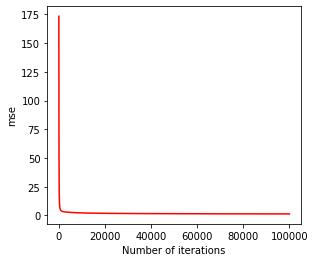

In [6]:
y_pred = np.dot(X_test_pol,W)
y_pred_train = np.dot(X_train_pol,W)
print('MES of PBF in test set:',mean_squared_error(y_test, y_pred))
print('MES of PBF in training set',mean_squared_error(y_train, y_pred_train))

MSE_2_test = mean_squared_error(y_test, y_pred)
MSE_2_train = mean_squared_error(y_train, y_pred_train)



plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(mse, color = 'red')
plt.xlabel('Number of iterations')
plt.ylabel('mse')

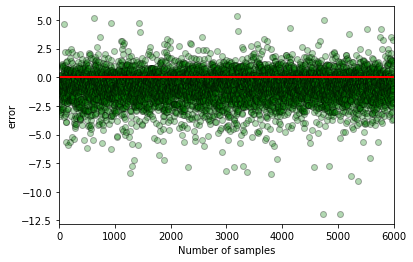

In [7]:
error = y_test-y_pred

n=list(range(6000))
plt.scatter(n,error, facecolor='green', edgecolor='k', alpha=0.3)
plt.hlines(y=0, xmin=0,xmax=6000,lw=2,color='red')
plt.xlim([-1,6000])
plt.xlabel('Number of samples')
plt.ylabel('error')
plt.show()

error2 = error

## 3.3 Ridge regression


### 3.3.1 Introduction

Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where linearly independent variables are highly correlated.

When we have a overfitting model, we need to use regularization like ridge regression to solve it. In this report, we import the sklearn to do the ridge regression problem.

The normal Linear Regression parameter \hat w^* :

$$\hat w^* = (X^TX)^{-1}X^T\mathbf y$$

After we add the ridge regularization:

$$\hat w^bridge = (X^TX + \mathbf gamma*I)^{-1}X^T\mathbf y$$

### 3.3.2 Training



In [8]:
from sklearn import linear_model

#reprepare the data
data_0 = pd.read_csv('FIFA22_official_data.csv')
data_1 = data_0.sample(n = 15000, replace = True)   #data_1: randomly choose 15000 samples from the massive dataset
y = data_1['Overall']                                 
X = data_1.drop('Overall', axis = 1)


X = np.array(X)
X = np.insert(X,0,1,axis=1)
y = np.array(y)
y = y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4)

#import sklearn to train
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)

[[ 0.          0.53909631  0.54967801  0.02311993 -0.01496419 -0.01714451
   0.02750187 -0.01772804 -0.0060299   0.0059541   0.0261292   0.01616546
   0.01970909  0.27557885  0.07484201  0.02307384  0.04677481 -0.03009364
  -0.01610963 -0.02751749 -0.00804603]]
[-12.78747967]


In [9]:
A = np.array(reg.coef_)
A = np.delete(A,0,axis=1)
print(A)
A = np.insert(A, [0], reg.intercept_, axis = 1)
print(A)

[[ 0.53909631  0.54967801  0.02311993 -0.01496419 -0.01714451  0.02750187
  -0.01772804 -0.0060299   0.0059541   0.0261292   0.01616546  0.01970909
   0.27557885  0.07484201  0.02307384  0.04677481 -0.03009364 -0.01610963
  -0.02751749 -0.00804603]]
[[-1.27874797e+01  5.39096315e-01  5.49678015e-01  2.31199264e-02
  -1.49641889e-02 -1.71445125e-02  2.75018748e-02 -1.77280357e-02
  -6.02989674e-03  5.95410261e-03  2.61292013e-02  1.61654650e-02
   1.97090858e-02  2.75578846e-01  7.48420103e-02  2.30738435e-02
   4.67748083e-02 -3.00936364e-02 -1.61096255e-02 -2.75174934e-02
  -8.04602598e-03]]


MES of RD in test set: 4.361840221962177
MES of RD in training set 4.287422927886669


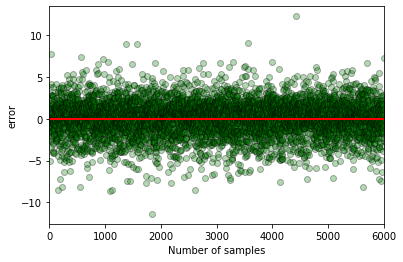

In [10]:
W = A.T
y_pred = np.dot(X_test,W)
y_pred_train = np.dot(X_train,W)
print('MES of RD in test set:',mean_squared_error(y_test, y_pred))
print('MES of RD in training set',mean_squared_error(y_train, y_pred_train))

MSE_3_test = mean_squared_error(y_test, y_pred)
MSE_3_train = mean_squared_error(y_train, y_pred_train)

error = y_test-y_pred

n=list(range(6000))
plt.scatter(n,error, facecolor='green', edgecolor='k', alpha=0.3)
plt.hlines(y=0, xmin=0,xmax=6000,lw=2,color='red')
plt.xlim([-1,6000])
plt.xlabel('Number of samples')
plt.ylabel('error')
plt.show()

error3 = error


# 4 Comparing


## 4.1 compare the real distribution of predict results

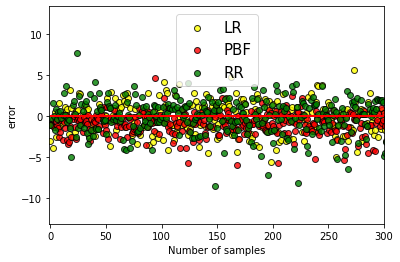

In [11]:
n=list(range(6000))

plt.scatter(n,error1, facecolor='yellow', edgecolor='k', alpha=0.8, label = 'LR')
plt.scatter(n,error2, facecolor='red', edgecolor='k', alpha=0.8, label = 'PBF')
plt.scatter(n,error3, facecolor='green', edgecolor='k', alpha=0.8, label = 'RR')
plt.hlines(y=0, xmin=0,xmax=300,lw=2,color='red')
plt.xlim([-1,300])
plt.xlabel('Number of samples')
plt.ylabel('error')
plt.legend(fontsize=15)

plt.show()

## 4.2 Compare the MSE result

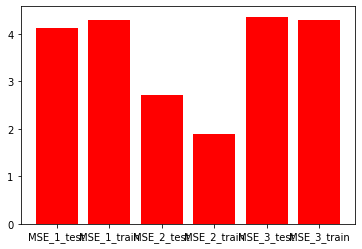

In [12]:
num_list = [MSE_1_test, MSE_1_train, MSE_2_test, \
            MSE_2_train, MSE_3_test, MSE_3_train]
name_list = ['MSE_1_test', 'MSE_1_train', 'MSE_2_test', \
            'MSE_2_train', 'MSE_3_test', 'MSE_3_train']
plt.bar(range(len(num_list)), num_list, \
        fc = 'r',tick_label = name_list)
plt.show()


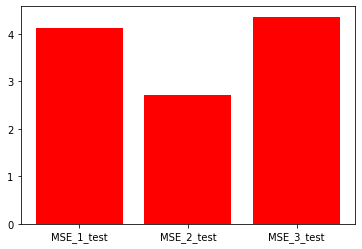

In [13]:
num_list = [MSE_1_test, MSE_2_test, MSE_3_test]
name_list = ['MSE_1_test', 'MSE_2_test', 'MSE_3_test']
plt.bar(range(len(num_list)), num_list, \
        color = 'r',tick_label = name_list)
plt.show()

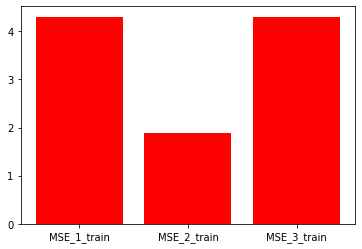

In [14]:
num_list = [MSE_1_train, MSE_2_train, MSE_3_train]
name_list = ['MSE_1_train', 'MSE_2_train', 'MSE_3_train']
plt.bar(range(len(num_list)), num_list, \
        fc = 'r',tick_label = name_list)
plt.show()

# 5. Discussion

For the quantitative analysis, we measure the performance of the model using Mean Squared Error(MSE) in test set. 

Besides, for the visualization, we use a residual plot to measure the performance of the model, which shows the The error between the predicted value and the true value of the test set. 

## 5.1 Linear Regression

The final **MES of LR in test set is 4.125840635882284**, and then from the results of residual plot, they indicate that the performance of Linear Regression is not very good, and maybe the interaction between inputs and output is not linear, and maybe there have the problem of overfitting.

## 5.2 Polymomial Basis Function

The final **MES of PBF in test set: 2.39  when iteration steps is 50000**, and then from the results of residual plot, we find that the performance of Polymomial Basis Function is good and better than Linear regression, that means the inputs and output have the nonlinear relations, and we need to use nonlinear model to solve these data. 

Besides, there will have different test mse results when I set different iteration steps, from 11.94(iteration step: 10000) to 2.39(iteration step: 50000) then to 2.72(iteration step: 100000), and it will continue to have better model and lower test MSE between 50000 and 100000 iteration step, but we do not want to test considering about the time-consuming.

Finally, the MES of PBF in training set is 2.19 when iteration step is 50000 and that of test is 2.39, that means the model has no problem of overfitting at that time. But the MES of PBF in training set is 2.72 when iteration step is 100000 and that of test is 1.88, that means the model at that time suffering a little overfitting problem.

## 5.3 Ridge Regression

The final **MES of RR in test set: 4.361840221962177**, and then from the results of residual plot, we know that the performance of Ridge Regression is not very good, similiar to Linear Regression but worse than Polynomial Basis Function, that can also means Linear Regression model has no overfitting problem considering Ridge Regression is mainly about solving overfitting problem.


# 6. Conclusion

Football is the most popular sport in the world, calculating and selecting suitable model to predict the overall score for a football player by using several personal attributes is very important.

In this report, we want use 20 inputs(football player personal attributes) to predict the output(final overall score for player). 

Then we train this model by using three methods: **Linear Regression, Polymomial Basis Function, Ridge Regression**. Even though Ridge Regression and Ridge Regression can have a good performance on the prediction, Polymomial Basis Function is more suitable for this prediction considering the nonlinear relationship between inputs and output, and Ridge Regression result is similar to Linear Regression indicates the LR model has no overfitting problem.


**code, dataset, report can be browsed in my github:** https://github.com/YihuaZhu111/Course_Pattern_Recognition_Report_1.git